D:\Code\Smooth-python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Smooth-python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Smooth-python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Smooth-python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Code\Smooth-python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) 

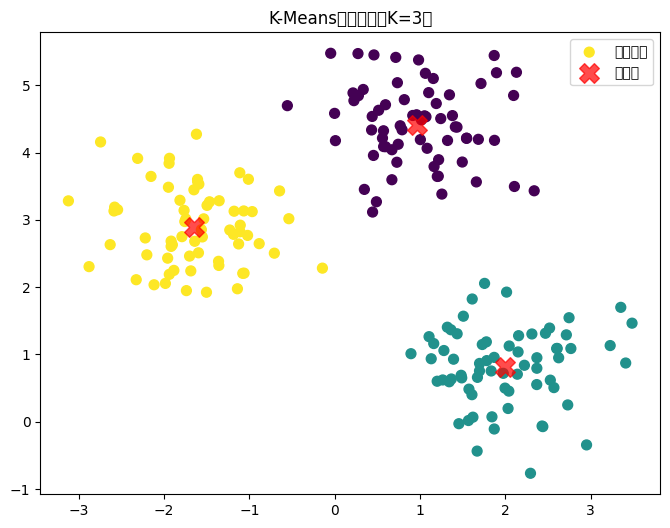

轮廓系数：0.677


In [1]:
# K-Means聚类
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # 生成模拟聚类数据
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # 聚类效果评估

# 1. 生成模拟数据（3个簇，200个样本）
X, y_true = make_blobs(
    n_samples=200, 
    centers=3,  # 真实簇数量
    cluster_std=0.60, 
    random_state=0
)

# 2. 训练K-Means模型（假设已知簇数量为3）
kmeans = KMeans(
    n_clusters=3,  # 指定簇数量
    init='k-means++',  # 智能初始化（避免随机初始中心的弊端）
    n_init=10,  # 多次初始化取最优结果
    max_iter=300,  # 最大迭代次数
    random_state=42
)
y_pred = kmeans.fit_predict(X)  # 训练并预测簇标签

# 3. 可视化聚类结果
plt.figure(figsize=(8, 6))
# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', label='聚类结果')
# 绘制簇中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='簇中心')
plt.title('K-Means聚类结果（K=3）')
plt.legend()
plt.show()

# 4. 评估聚类效果（轮廓系数：-1~1，越接近1越好）
print(f"轮廓系数：{silhouette_score(X, y_pred):.3f}")